<br><br>
<span style="font-size:2em;font-weight:lighter;">194.025 Introduction to Machine Learning</span><br>
<span style="font-size:3em;font-weight:normal;line-height:70%;">Assignment 6: Learning Theory</span>

---



Welcome to the 6th assignment of our course **Introduction to Machine Learning**. You can earn up to a total of 10 points. This time, you get only 2 points for the notebook. You earn the remaining 8 points by solving the tasks in the additional pdf. Please read all descriptions carefully to get a full picture of what you have to do. 

**Remark:** Some code cells are put to read-only. Please execute them regardless as they contain important code. You can run a jupyter cell by pressing `SHIFT + ENTER`, or by pressing the play button on top (in the row where you can find the save button). Cells where you have to implement code contain the comment `# YOUR CODE HERE` followed by `raise NotImplementedError`. Simply remove the `raise NotImplementedError`and insert your code.

Some other code cells start with the comment `# hidden tests ...`. Please do not change them in any way as they are used to grade the tasks after your submission.

This assignment is split between this notebook and an additional pdf. Please submit a pdf containing your solutions to TUWEL in the section _Exercises & Project_.

**Remark:** We highly encourage you to use LaTeX for your solution as this also makes it easy for us to read. If you are not familiar with LaTeX and/or do not have time to use it, please write in a clear & clean manner.

## Empirical Risk minimization

Let $\mathcal{X} = \mathbb{R}^2$ and let $\mathcal{H}_\square$ be the hypothesis space of axis-aligned rectangles in $\mathcal{X}$. That is, any $h_{(a_1,a_2,b_1,b_2)} \in \mathcal{H}_\square$ with $a_1, a_2, b_1, b_2 \in \mathbb{R}$ defines a rectangle $[a_1,a_2]\times[b_1,b_2]$ that classifies $h_{(a_1,a_2,b_1,b_2)}(x)=1$ iff $x\in[a_1,a_2]\times[b_1,b_2]$.

**Task 1a. (2pt)** Implement an ERM algorithm for $\mathcal{H}_\square$ with polynomial runtime (assuming realizability). This means that you have to implement an algorithm that, given any realizable sample $S$, returns a hypothesis $h_S \in \mathcal{H}_\square$ perfectly classifying $S$.

In [37]:
import numpy as np

In [38]:
def rectangle_classifier_fit(X, y):
    """
    Use an ERM algorithm to fit your data.
    In this example, the parameters a, b represent the hypothesis.

    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
    y : array-like, shape (n_samples,)

    Returns
    -------
    a : tuple
        Defines the left and right border of the rectangle.
    b : tuple
        Defines the top and bottom border of the rectangle.

    """
    # YOUR CODE HERE

    a = np.array([0, -1])  # invalid range
    b = np.array([0, -1])

    positives = X[y == 1]

    if positives.size > 0:
        # Compute bounds of the rectangle
        a1 = np.min(positives[:, 0])
        a2 = np.max(positives[:, 0])
        b1 = np.min(positives[:, 1])
        b2 = np.max(positives[:, 1])
        
        a = np.array([a1, a2])
        b = np.array([b1, b2])

    return a, b

In [39]:
def rectangle_classifier_predict(X, a, b):
    """Predict the label of the given instances using the defined rectangle classifier.

    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Input instances.
    a : tuple
        Defines the left and right border of the rectangle.
    b : tuple
        Defines the top and bottom border of the rectangle.

    Returns
    -------
    y_pred : np.ndarray, shape (n_samples,)
        Predicted label of the given instances.
    """
    # YOUR CODE HERE

    inside_x = (X[:, 0] >= a[0]) & (X[:, 0] <= a[1])
    inside_y = (X[:, 1] >= b[0]) & (X[:, 1] <= b[1])
    inside_rectangle = inside_x & inside_y
    
    y_pred = inside_rectangle.astype(int)
    return y_pred

In [40]:
# Training data 1
X = np.array([[0, 0], [0, -1], [2, 4], [2, 3], [2, 5], [4, 2], [1, 15], [3, 2], [5, 3]])
X = np.random.random_sample(size=(50, 2)) * 5
y = rectangle_classifier_predict(X, a=(2,4), b=(1,4))
# y = np.array([0, 0, 1, 1, 0, 1, 0, 1, 0])

The below cell visualizes your fit method. The dot color describes the true labels (red=0, blue=1), and the rectangle is your found rectangle. This means that your rectangle should contain exactly the blue dots.

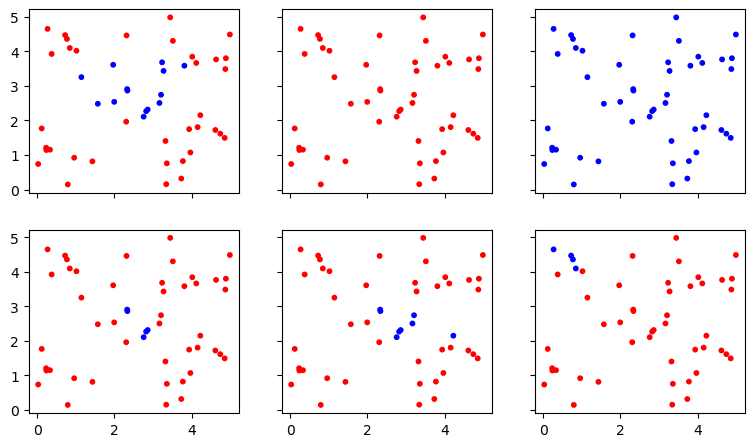

In [41]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# Initialize random state (do not change this for your visualization)
rng = np.random.default_rng(14)

# Generate data
X = rng.random(size=(50, 2)) * 5
y1 = [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]
y2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y3 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y4 = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y5 = [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y6 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Plot points with true labels and learned rectangle
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
fig.set_size_inches(18.5/2, 10.5/2, forward=True)
axes = axes.flatten()
colors = np.array(['red', 'blue'])

for ax, y in zip(axes, [y1, y2, y3, y4, y5, y6]):
    # Fit rectangle
    a, b = rectangle_classifier_fit(X, y)

    # Plot points
    ax.scatter(X[:,0], X[:,1], c=colors[y], s=10)

    # Plot rectangle if it is not empty
    if a[1] >= a[0] and b[1] >= b[0]:
        rectangle = Rectangle((a[0], b[0]), width=a[1]-a[0], height=b[1]-b[0], fill=False, lw=3, alpha=.2, color='blue')
        ax.add_patch(rectangle)
plt.show()

The below cell visualizes your predict method. The dot color describes the true labels (red=0, blue=1), and the rectangle is your found rectangle. This means that exactly the dots inside the rectangles should be blue.

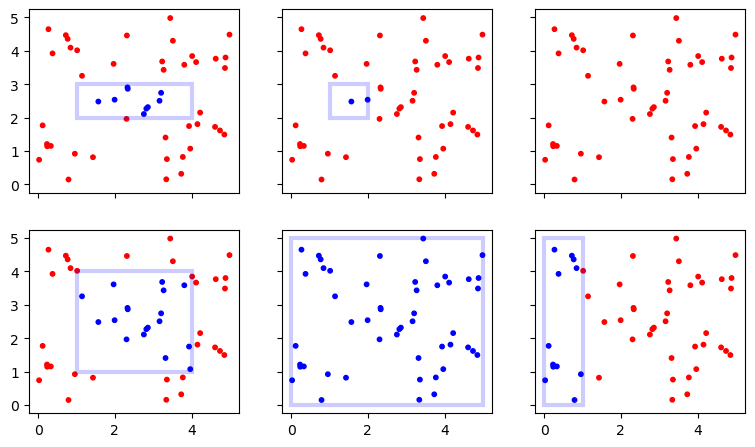

In [42]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
rng = np.random.default_rng(14)

# Generate data
X = rng.random(size=(50, 2)) * 5
params = [[(1, 4), (2, 3)], [(1, 2), (2, 3)], [(1, 0), (2, 3)], [(1, 4), (1, 4)], [(0, 5), (0, 5)], [(0, 1), (0, 5)]]

# Plot points with true labels and learned rectangle
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
fig.set_size_inches(18.5/2, 10.5/2, forward=True)
axes = axes.flatten()
colors = np.array(['red', 'blue'])

for ax, (a, b) in zip(axes, params):
    # Fit rectangle
    y = rectangle_classifier_predict(X, a, b)

    # Plot points
    ax.scatter(X[:,0], X[:,1], c=colors[y], s=10)

    # Plot rectangle if it is not empty
    if a[1] >= a[0] and b[1] >= b[0]:
        rectangle = Rectangle((a[0], b[0]), width=a[1]-a[0], height=b[1]-b[0], fill=False, lw=3, alpha=.2, color='blue')
        ax.add_patch(rectangle)
plt.show()

In [43]:
# hidden tests - DO NOT CHANGE THIS CELL

In [44]:
# Training data 2
X = np.array([[0, 0], [0, -1], [2, 3], [2, 3], [2, 5], [4, 2], [1, 15], [3, 2]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
# hidden tests - DO NOT CHANGE THIS CELL

In [46]:
# Training data 3: Unknown data

In [47]:
# hidden tests - DO NOT CHANGE THIS CELL

## Theory Part (8pt)

For the theory part, please solve tasks 1b. and 2 in *exercise_6.pdf* and upload your solution to TUWEL.